In [1]:
#
# The purpose of this script is to 
# make it ammenable to visually 
# inspect the data from the 
# golden image study.
#
# Author: MK Swaminathan
#

import os, sys
import cv2
import urllib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# URL to IM Lib
from golden_im import *

# Import golden image data
golden_res = pd.read_csv('../../HIT-Support/dat/golden_results_new.csv')

dat = np.asarray([golden_res.loc[:,'Answer.slider_values'][i].split(',') 
    for i in range(len(golden_res.loc[:,'Answer.slider_values']))])[:,:-1].astype(int)

# Order by variances
var_i = np.argsort(np.var(dat, axis=0))


# Plot to inspect spread of data overall and expected value
for i in range(len(dat)):
    plt.scatter(np.arange(len(dat[0])), dat[i,var_i])

plt.xticks(np.arange(len(dat[0])), var_i)
plt.xlabel('Sorted Variance')
plt.ylabel('Compression Param')
plt.title('Plotting Golden Image Data by Sorted Variances')
plt.tight_layout()

plt.figure()

plt.errorbar(np.arange(len(dat[0])), np.mean(dat,axis=0)[var_i], np.std(dat, axis=0)[var_i], fmt='o')
plt.xticks(np.arange(len(dat[0])), var_i)
plt.ylim(0,50)
plt.xlabel('Sorted Variance')
plt.ylabel('Compression Param')
plt.title('Plotting Expected Value by Sorted Variance')
plt.tight_layout()

plt.figure()
for i in range(len(dat)):
    plt.scatter(np.arange(len(dat[0])), dat[i,var_i],marker='x')

plt.errorbar(np.arange(len(dat[0])), np.mean(dat,axis=0)[var_i], 1.5*np.std(dat, axis=0)[var_i], fmt='o')

plt.show()



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

[18.  22.5 23.5 29.5 28.5 26.  27.5 25.  20.  22.  24.  23.  25.  32.
 18.  15.  19.5 21.  26.  23.5 21.  20.5 22.5 22.  22.5 21.  24.  15.5
 30.  23.5 21.5 22.5 24.  20.5 24.5 19.5 20.5 26.  20.5 25.  23.5 24.
 24.  21.5 16.5 25.5 29.5 19.  18.5 22.  19.5 20.5 21.5 20.  22.  15.5
 21.5 26.5 23.  22.5 33.5 22.5 24.5 22.  21.5]
[18.3  22.4  24.45 25.9  25.1  25.45 26.25 25.25 22.25 20.75 27.   24.75
 24.4  30.8  22.15 15.3  20.6  21.3  24.5  24.55 23.   21.15 24.3  23.7
 22.7  21.05 23.1  17.1  26.6  21.7  22.25 21.75 23.8  22.1  24.   19.45
 20.6  26.25 22.2  23.85 25.   23.2  26.25 24.35 17.6  26.8  28.05 20.25
 19.9  20.7  22.15 21.15 21.75 19.5  22.05 17.8  23.1  25.95 23.85 22.7
 32.75 23.85 26.2  23.05 22.6 ]
[-0.3   0.1  -0.95  3.6   3.4   0.55  1.25 -0.25 -2.25  1.25 -3.   -1.75
  0.6   1.2  -4.15 -0.3  -1.1  -0.3   1.5  -1.05 -2.   -0.65 -1.8  -1.7
 -0.2  -0.05  0.9  -1.6   3.4   1.8  -0.75  0.75  0.2  -1.6   0.5   0.05
 -0.1  -0.25 -1.7   1.15 -1.5   0.8  -2.25 -2.85 -1.1  -1.

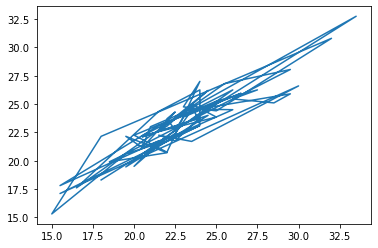

In [24]:
# This cell will attempt to apply compression ratios based on the std of the golden images
# and visualize what these results mean.

import cv2 as cv2_electric_boogaloo

outpath = 'Golden_JPEG/'

g_std = np.std(dat, axis=0)
g_mu = np.mean(dat, axis=0)
g_med = np.median(dat, axis=0)

print(g_med)
print(g_mu)
print(g_med-g_mu)

#x = np.asarray([i for i in range(len(g_med))])

from scipy.stats import linregress

linregress(g_med,g_mu)
#plt.scatter(g_med,g_mu)
#plt.plot(g_med,g_mu,color='red',linewidth=3)
plt.scatter(x,g_med-g_mu)
n=0.5 #change standard deviation (half a deviation right now)

# for index in range(len(golden_names)):
#     img = get_im(golden_names[index])
#     img_path = outpath + golden_names[index][:-4]
    
#     print("writing to " + img_path)
    
#     cv2_electric_boogaloo.imwrite(img_path+"_h_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]+n*g_std[index]])
#     cv2_electric_boogaloo.imwrite(img_path+"_l_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]-n*g_std[index]])
#     cv2_electric_boogaloo.imwrite(img_path+"_m_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]])

In [15]:
from scipy import stats
pen = stats.linregress(g_mu,g_med)
print(pen)


LinregressResult(slope=1.1110385323311394, intercept=-2.961570009344406, rvalue=0.9147744697466214, pvalue=1.7281840327195248e-26, stderr=0.06181423246448173)
